<a href="https://colab.research.google.com/github/benmccloskey/Linear_Regression/blob/main/Diabetes_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from sklearn import datasets
from sklearn.model_selection import train_test_split #How to load the function into Python
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes(as_frame=True)

X =  diabetes.data
y = diabetes.target

print('Number of Samples:', diabetes.data.shape[0])
print('Number of Targets:', diabetes.target.shape[0])

Number of Samples: 442
Number of Targets: 442


In [140]:
#Split Training Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, train_size=422)

print('Training Set Size:', X_train.shape[0])
print('Test Set Size:', X_test.shape[0])

Training Set Size: 422
Test Set Size: 20


In [141]:
#Training the model 
LR = LinearRegression()
LR.fit(X_train,y_train)

print('Coefficients:', LR.coef_)
print('-'*85)
print('Coefficient for Each Individual Feature')
for i,val in enumerate(list(diabetes.data)):
  print(val, ':', LR.coef_[i])

#y_dependent_variable = fixed_variable + -18.96age -217.37sex ... + error

Coefficients: [ -28.79695689 -236.67402245  528.66615535  308.67582123 -888.2356273
  540.48881018  143.31167784  185.10113347  811.5323077    90.40195281]
-------------------------------------------------------------------------------------
Coefficient for Each Individual Feature
age : -28.79695688906699
sex : -236.6740224504299
bmi : 528.6661553491131
bp : 308.6758212329354
s1 : -888.2356273041631
s2 : 540.488810184226
s3 : 143.31167784305464
s4 : 185.10113347174075
s5 : 811.53230769848
s6 : 90.40195281426112


In [142]:
#Predictions
pred = LR.predict(X_test)

print("Predictions:", pred)

print('-'* 85)
print('Actual (Y Test):', np.asarray(y_test))



Predictions: [240.95680803 121.02072628 201.19463898 156.92710508 120.96999469
 109.11379145  99.01299982 142.73697657  84.78651151  63.44607545
 115.3958469  133.99031577  98.85373154 162.66727181 122.47283948
 210.43542802 158.39597275 169.70134008 232.99606106 155.8502329 ]
-------------------------------------------------------------------------------------
Actual (Y Test): [252. 145. 123.  86. 214.  72. 125. 190.  49. 143. 182. 170. 118. 141.
 144.  52. 185. 235. 217.  85.]


In [143]:
#Variance 
print(LR.score(X_test, y_test)) #0.6014, not close to 1

-0.11631688719762034


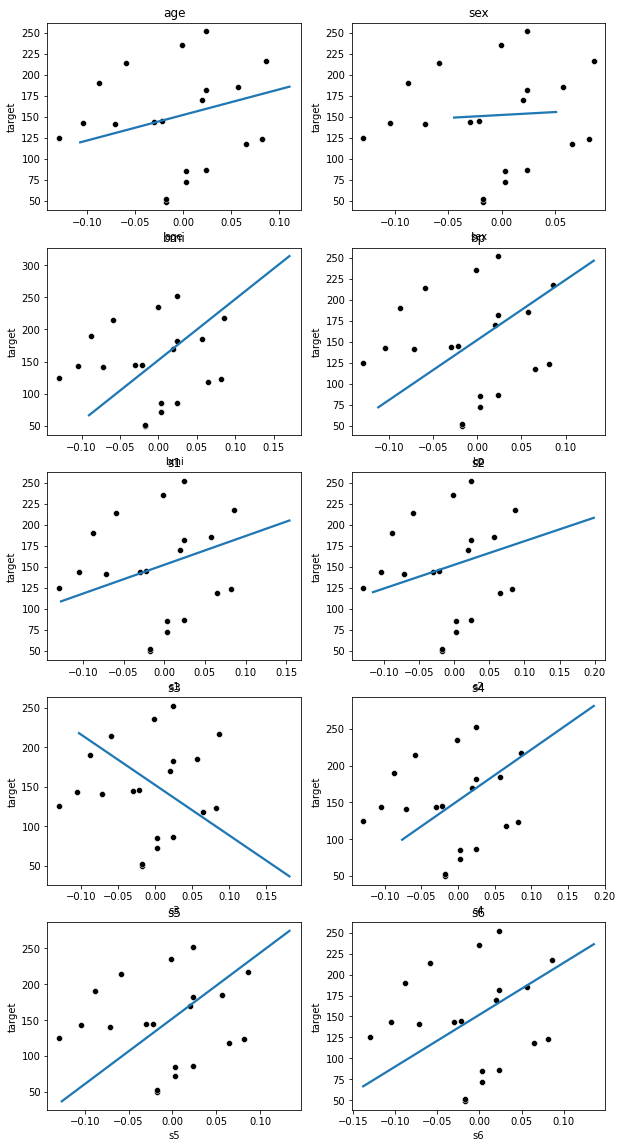

In [153]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

mapping = {}
for i,val in enumerate(list(diabetes.data)):
  mapping[i] = val

fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Use a loop to create and customize each plot
for i, ax in enumerate(axs.flat):
    # Generate and plot the data
    sns.regplot(data = diabetes, x=diabetes.data[mapping[i]],y=diabetes.target, scatter=False, ci=None, ax=ax)
    sns.scatterplot(X_test[val], y_test, ax=ax, color = 'black')
    ax.set_title(mapping[i])


In [102]:
df = pd.DataFrame(np.column_stack((diabetes.data, diabetes.target)), columns = diabetes.feature_names+['target'])
cor = df.corr()

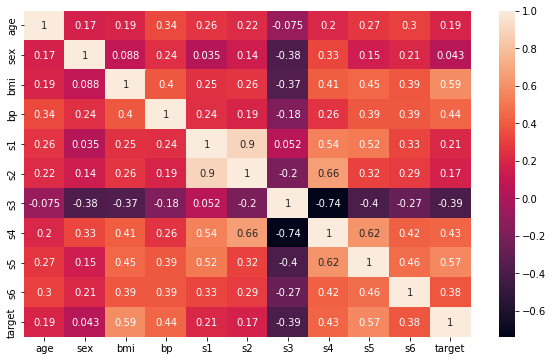

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

In [104]:
threshold=0.5
a = abs(cor['target'])
result= a[a>.5]
result 

#Depending on the threshold you then can build a model with these targets

bmi       0.586450
s5        0.565883
target    1.000000
Name: target, dtype: float64

At a correlation threshold of 0.5, BMI and S5 are both highly correlated with the target variable, when compared to all of features of the dataset. 

In [154]:
#Creating a new model with the correlated factors
X = df[['bmi', 's5']] #New X Variables
y = df['target'] #Target Variables


In [155]:
#Splitting the Training/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, train_size=422)


In [156]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print('Coefficients:', LR.coef_)

Coefficients: [679.22873096 585.09028108]


In [157]:
pred = LR.predict(X_test)

print("Predictions:", pred)

print('-'* 85)
print('Actual (Y Test):', np.asarray(y_test))


Predictions: [172.78258719 114.05073468 160.78959231 166.73150058 194.96313604
  74.66889595 106.84725864  95.39880129 259.94704755 162.4898324
  95.44365648  97.88688128 156.29443172 135.94698315  85.59250469
  87.88375718  99.33339621 120.42923379 257.85479861 202.41932241]
-------------------------------------------------------------------------------------
Actual (Y Test): [147.  64.  95. 259. 249.  65.  72.  79. 277. 181.  47.  69.  85.  84.
  65. 101.  52. 168. 306. 229.]


In [158]:
#Variance 
print(LR.score(X_test, y_test)) #Not close to 1

0.7100705499900317


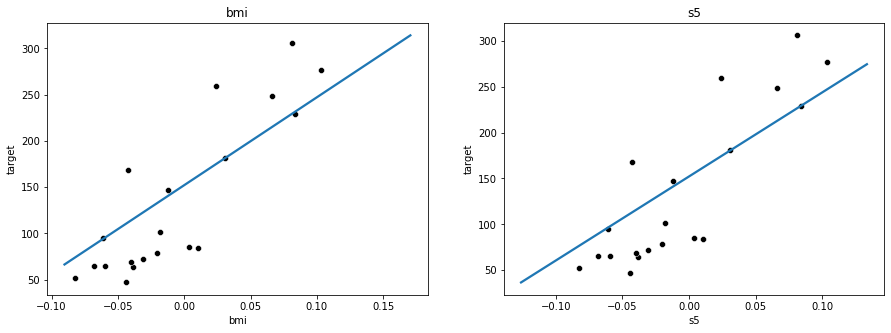

In [164]:
mapping = {}
for i, val in enumerate(X_train):
  mapping[i] = val

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Use a loop to create and customize each plot
for i, ax in enumerate(axs.flat):
    # Generate and plot the data
    sns.regplot(data = diabetes, x=diabetes.data[mapping[i]],y=diabetes.target, scatter=False, ci=None, ax=ax)
    sns.scatterplot(X_test[val], y_test, ax=ax, color = 'black')
    ax.set_title(mapping[i])
